# Surprise Housing Assignment
We have a dataset with information related to house prices and its features. Our aim is to identify which variables are significant in the prediction of price. Also, we want to identify how well each variable predicts the price.

### -------------------------------------------------------Data Cleaning---------------------------------------------------------
First, we will perform some checks to see if data is clean. Else we will clean it.
We clean this data in following order.<br>
1) Dropping/imputing rows.<br>

2) Dropping columns.<br>

3) Cleaning values: For example, data type conversion, creating dummy variables.<br>

 <br>
 <br>
 Note: We may still drop/ignore certain columns during analysis if they are not found to be useful

In [1]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading data in to variable named 'df'
pd.set_option('display.max_rows', 500)#to see upto 500 rows at once
pd.set_option('display.max_columns', 500)#to see upto 500 columns at once
df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
#we see 1460 rows and 81 columns initially
df.shape

(1460, 81)

Identifying columns with non-null values

In [4]:
#checking what percentage of each column is null
null_percentage=df.isnull().sum() * 100 / df.shape[0]
null_percentage[null_percentage>0]#finding columns with atleast one null value

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

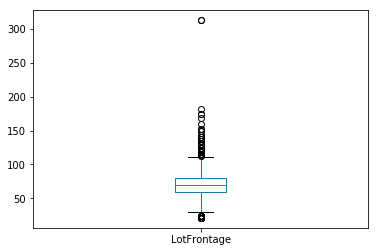

In [5]:
#LotFrontage is a numeric field and has 17% missing values, but it can be important feature
#lets check it's distribution
df.LotFrontage.plot.box()#we can see one outlier
df.LotFrontage.describe()#there isnt much difference between mean and median, we can use median and impute

In [6]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [7]:
#let's check frequency of each type of FireplaceQu
df.FireplaceQu.value_counts()#we dont see an occurance of 'NA' string which was mentioned in data description. 
#So, it seems NA refers to 'No Fireplace' but not NULL
#lets fix this in next step

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [8]:
#let's replace nulls in categorical columns corresponding definition from data description field.
#Note: This is not imputation. This is data correction. We will do imputation next if needed
df['Alley'].fillna('NoAlleyAccess', inplace=True)
df['BsmtQual'].fillna('NoBasement', inplace=True)
df['BsmtCond'].fillna('NoBasement', inplace=True)
df['BsmtExposure'].fillna('NoBasement', inplace=True)
df['BsmtFinType1'].fillna('NoBasement', inplace=True)
df['BsmtFinType2'].fillna('NoBasement', inplace=True)
df['FireplaceQu'].fillna('NoFireplace', inplace=True)
df['GarageType'].fillna('NoGarage', inplace=True)
#df['GarageYrBlt'].fillna(0, inplace=True)#this is not a categorical field. But we have to impute this.
df['GarageFinish'].fillna('NoGarage', inplace=True)
df['GarageQual'].fillna('NoGarage', inplace=True)
df['GarageCond'].fillna('NoGarage', inplace=True)

df['PoolQC'].fillna('NoPool', inplace=True)
df['Fence'].fillna('NoFence', inplace=True)
df['MiscFeature'].fillna('None', inplace=True)

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

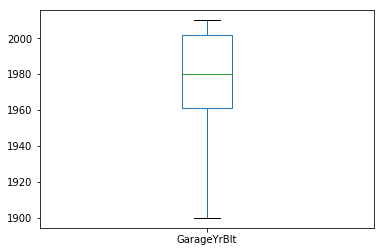

In [9]:
df.GarageYrBlt.plot.box()#most of the garages are built in the latter half of the century
df['GarageYrBlt'].describe()#mean and median look quite close

In [10]:
#GarageYrBlt has a null for houses that have no garage. However, not giving a numeric value to this field will make it hard to calcualte
#we can input zero as year for houses with no garage, but most of the data is from 1900 to 2010 which is quite distant from zero.
#So, instead of using year, we can have age of the garage in the same field. Year 1900 can have 111 years age and 2010 can have 1 year age. 'No garage' can have zero years as age
#print(df['GarageYrBlt'].head(50))#before modifying
df['GarageYrBlt']=df['GarageYrBlt'].apply(lambda x: df['GarageYrBlt'].max()-x+1)#converting year to age
df['GarageYrBlt'].fillna(0, inplace=True)#replacing null with zero
#print(df['GarageYrBlt'].head(50))#after modifying

#we will also modify any other year field to convert them to age at a later point

In [11]:
#checking what percentage of each column is null
null_percentage=df.isnull().sum() * 100 / df.shape[0]
#null_percentage  #there are not any null values in any of the columns
null_percentage[null_percentage>0]#finding columns with atleast one null value

MasVnrType    0.547945
MasVnrArea    0.547945
Electrical    0.068493
dtype: float64

Dropping rows for remaining null values

In [12]:
df.dropna(axis='rows', inplace=True)
df.shape#number of rows have fallen down to 1451

(1451, 81)

Checking the diversity of data:<br>
Non-numeric data with most values being unique dont contribute much(too much diversity).<br>
Variables with all values being same also dont contribute much(no diversity).

In [13]:
#checking what fields have all values as unique
df.nunique(axis=0)[df.nunique(axis=0)/len(df)==1]#id has all values as unique. It's not a numeric field and can be dropped

Id    1451
dtype: int64

In [14]:
#checking what fields have 5% or more of their total entries as unique
#df.nunique(axis=0)[df.nunique(axis=0)/len(df)>0.05]
df[df.nunique(axis=0)[df.nunique(axis=0)/len(df)>0.05].index.tolist()].head(1)#All of these are numeric except Id. Hence diversity can be expected. No need to drop any columns other than Id
#df[df.nunique(axis=0)[(df.nunique(axis=0)/len(df)<=0.05) & (df.nunique(axis=0)/len(df)>0.01)].index.tolist()].head(1)

,Id,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,1,65.0,8450,2003,196.0,706,0,150,856,856,854,1710,8.0,548,0,61,0,0,208500


In [15]:
#dropping ID column
df.drop(['Id'],axis=1,inplace=True)
df.shape#number of columns have been reduced by 1

(1451, 80)

In [16]:
df=df.drop_duplicates()#dropping any dplicate rows
df.shape

(1451, 80)

Validating the datatype of each column:<br>
Some columns maybe marked as numeric even though they are categorical<br>
Some columns maybe marked as categorical even though they are numeric<br>
We will confirm type by using data description file

In [17]:
df.describe(include='all')#all column description

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1451.000000,1451,1451.000000,1451.000000,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451,1451.000000,1451.000000,1451.000000,1451.000000,1451,1451,1451,1451,1451,1451.00000,1451,1451,1451,1451,1451,1451,1451,1451.000000,1451,1451.000000,1451.000000,1451.000000,1451,1451,1451,1451,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451,1451.000000,1451,1451.000000,1451,1451,1451.000000,1451,1451.000000,1451.000000,1451,1451,1451,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451,1451,1451,1451.000000,1451.000000,1451.000000,1451,1451,1451.000000
unique,NaN,5,NaN,NaN,2,3,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,4,NaN,4,5,6,5,5,5,7,NaN,7,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,6,7,NaN,4,NaN,NaN,6,6,3,NaN,NaN,NaN,NaN,NaN,NaN,4,5,5,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,None,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,NoFireplace,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,NoPool,NoFence,None,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1145,NaN,NaN,1445,1361,918,1302,1450,1045,1373,225,1251,1436,1212,721,NaN,NaN,NaN,NaN,1133,1425,509,498,863,NaN,905,1273,638,648,1303,945,427,NaN,1247,NaN,NaN,NaN,1419,734,1356,1326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,734,NaN,1352,NaN,685,863,NaN,605,NaN,NaN,1302,1317,1331,NaN,NaN,NaN,NaN,NaN,NaN,1444,1170,1397,NaN,NaN,NaN,1261,1193,NaN
mean,56.933150,NaN,69.845624,10507.808408,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.093728,5.579600,1971.092350,1984.760165,NaN,NaN,NaN,NaN,NaN,103.75672,NaN,NaN,NaN,NaN,NaN,NaN,NaN,442.274983,NaN,46.838043,567.197105,1056.310131,NaN,NaN,NaN,NaN,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,NaN,6.516885,NaN,0.612681,NaN,NaN,30.824259,NaN,1.764990,472.525155,NaN,NaN,NaN,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,NaN,NaN,NaN,43.758787,6.319090,2007.815300,NaN,NaN,180624.101999
std,42.350366,NaN,22.044429,9992.987081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.381467,1.113415,30.190266,20.651334,NaN,NaN,NaN,NaN,NaN,181.10815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,455.369276,NaN,161.777324,442.209192,437.914609,NaN,NaN,NaN,NaN,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,NaN,1.626576,NaN,0.643443,NaN,NaN,25.130888,NaN,0.748728,214.171752,NaN,NaN,NaN,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,NaN,NaN,NaN,497.648467,2.700353,1.329376,NaN,NaN,79312.128273
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN

In [18]:
#MSSubClass, MoSold should be converted to object type
df['MSSubClass'] = df['MSSubClass'].astype('object')#OverallQual and OverallCond are numerically quantifiable fields, hence not converting to object
df['MoSold'] = df['MoSold'].astype('object')#not converting YrSold to category as it's a continously growing value without range limits, while month only exists between 1 to 12
#print(df.MSSubClass.dtype,df.MoSold.dtype)

In [19]:
#converting YearBuilt to age
print(df['YearBuilt'].head(3))#before converting year built to age of house
df['YearBuilt']=df['YearBuilt'].apply(lambda x: df['YearBuilt'].max()-x+1)#adding +1 to make the latest built house one year old
print(df['YearBuilt'].head(3))#before converting year built to age of house

0    2003
1    1976
2    2001
Name: YearBuilt, dtype: int64
0     8
1    35
2    10
Name: YearBuilt, dtype: int64


Checking correlation among features

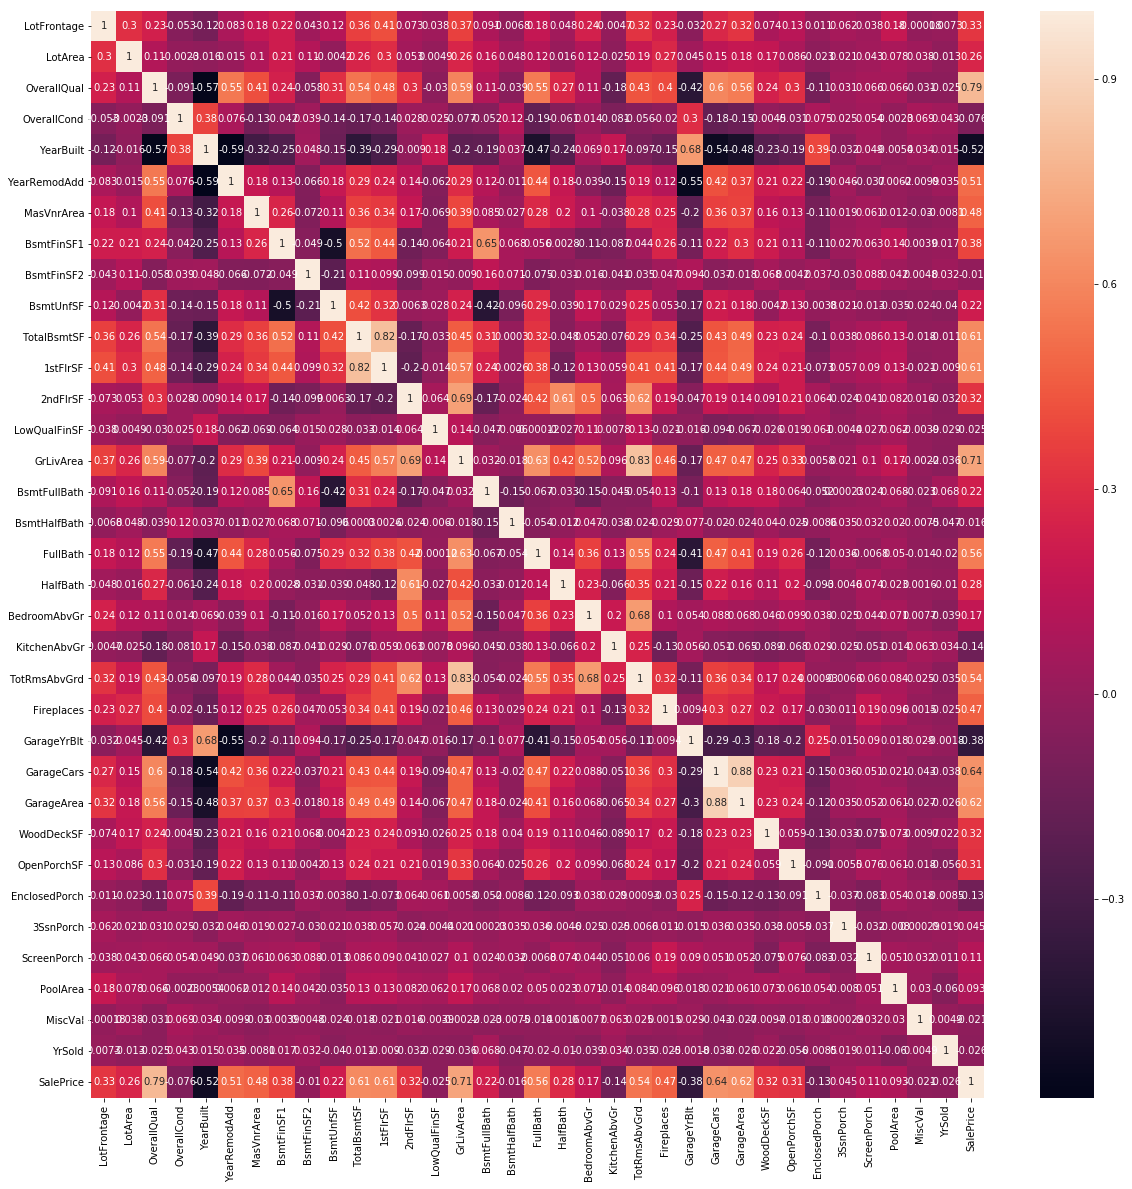

In [20]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

plt.show()#there seems to be some correlation between TotalBsmtSF & 1stFlrSF, GrLivArea & TotRmsAbvGrd and GarageArea & GarageCars
#we will remove one from each pair

In [21]:
df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'], axis=1, inplace = True)#dropping these columns as they have good covariance with other columns
df.shape

(1451, 77)

### --------------------------------------------------End of Data Cleaning---------------------------------------------------------

### -----------------------------------------------------Data Visualization----------------------------------------------------------

Checking data to identify correlations w.r.t dependent variables and outliers

In [22]:
#preparing a list of numeric columns so that we can check how they vary with sale price
nums=df.select_dtypes(include=['float64','int64']).columns.tolist()
print(len(nums))#we have 32 numeric columns(sale price is the dependent variable)

32


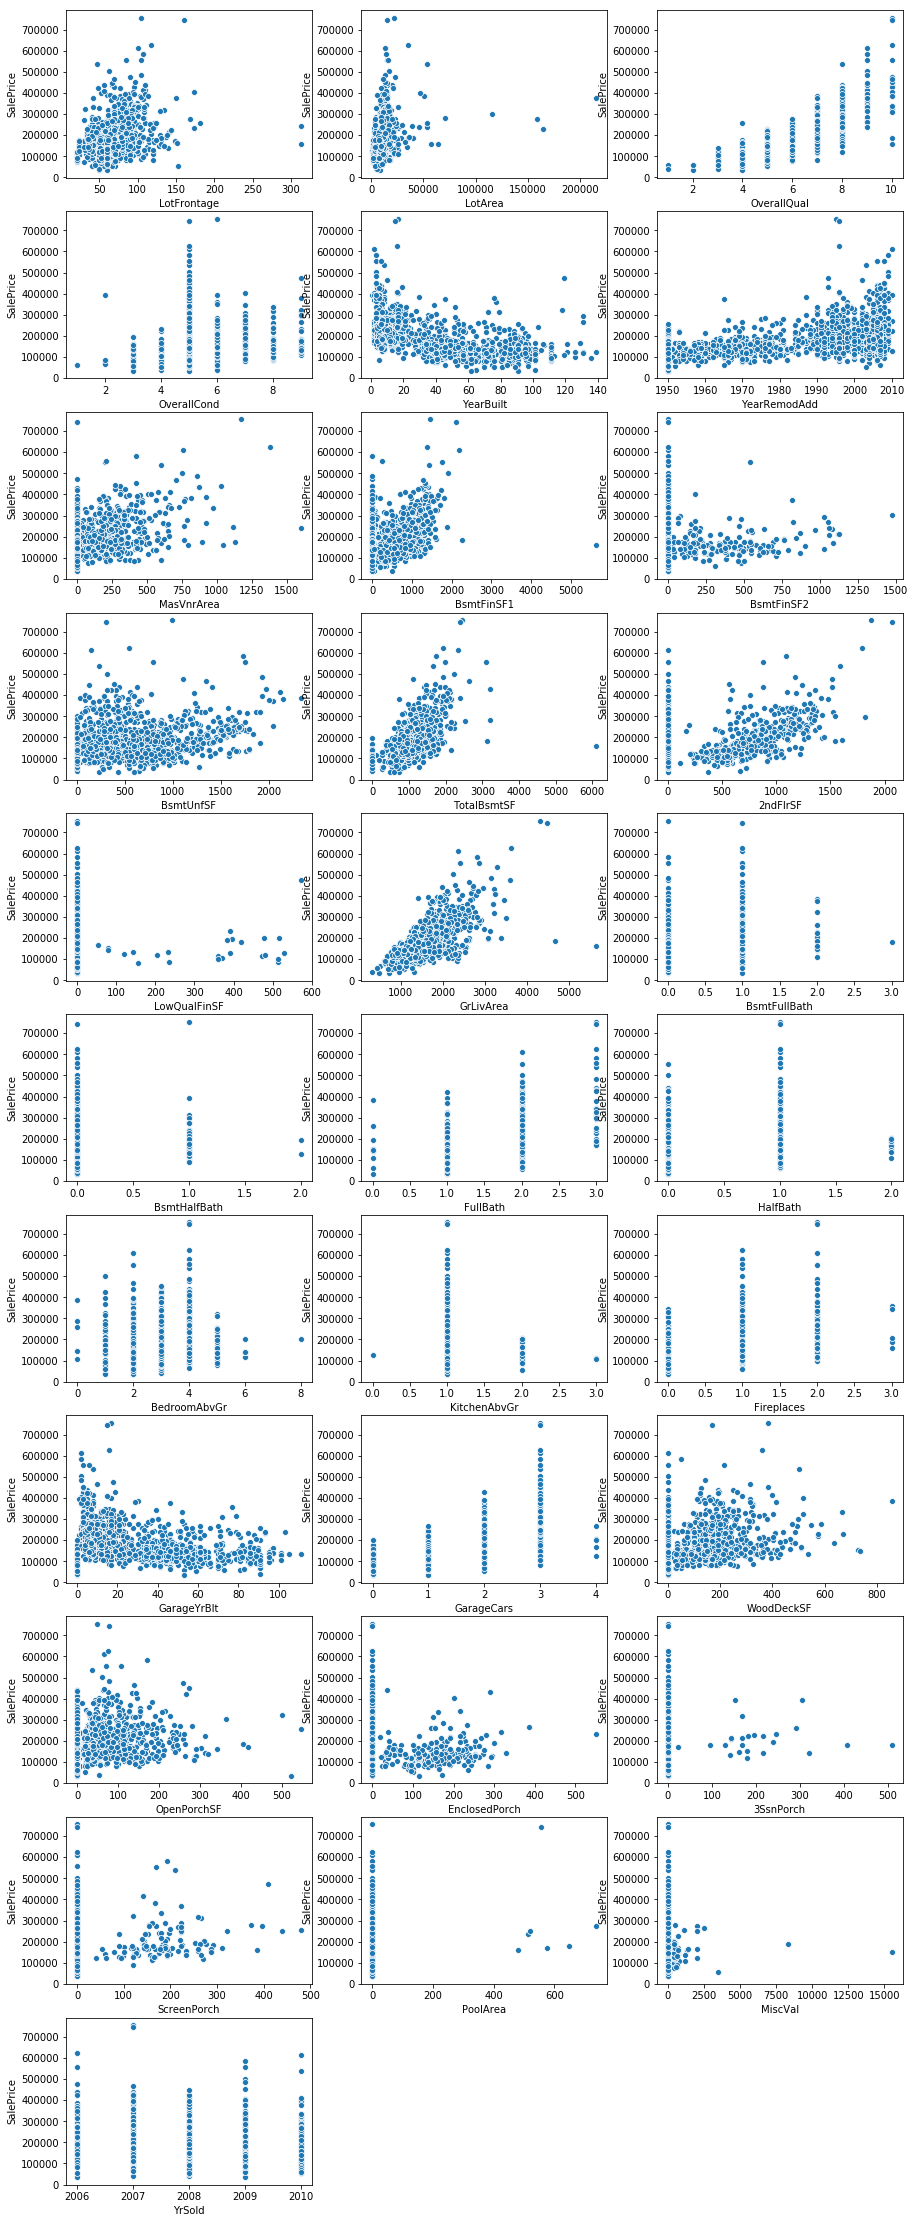

In [23]:
#plotting scatterplot of saleprice w.r.t all other numeric variables
plt.figure(figsize=(15, 40))
for i in range(len(nums)-1):#SalePrice is the last column, so we are skipping it
    plt.subplot(math.ceil((len(nums)-1)/3),3,i+1)
    sns.scatterplot( data = df , x = nums[i] , y = 'SalePrice')
plt.show()#we dont see much definitive patterns of relationship between saleprice and other columns

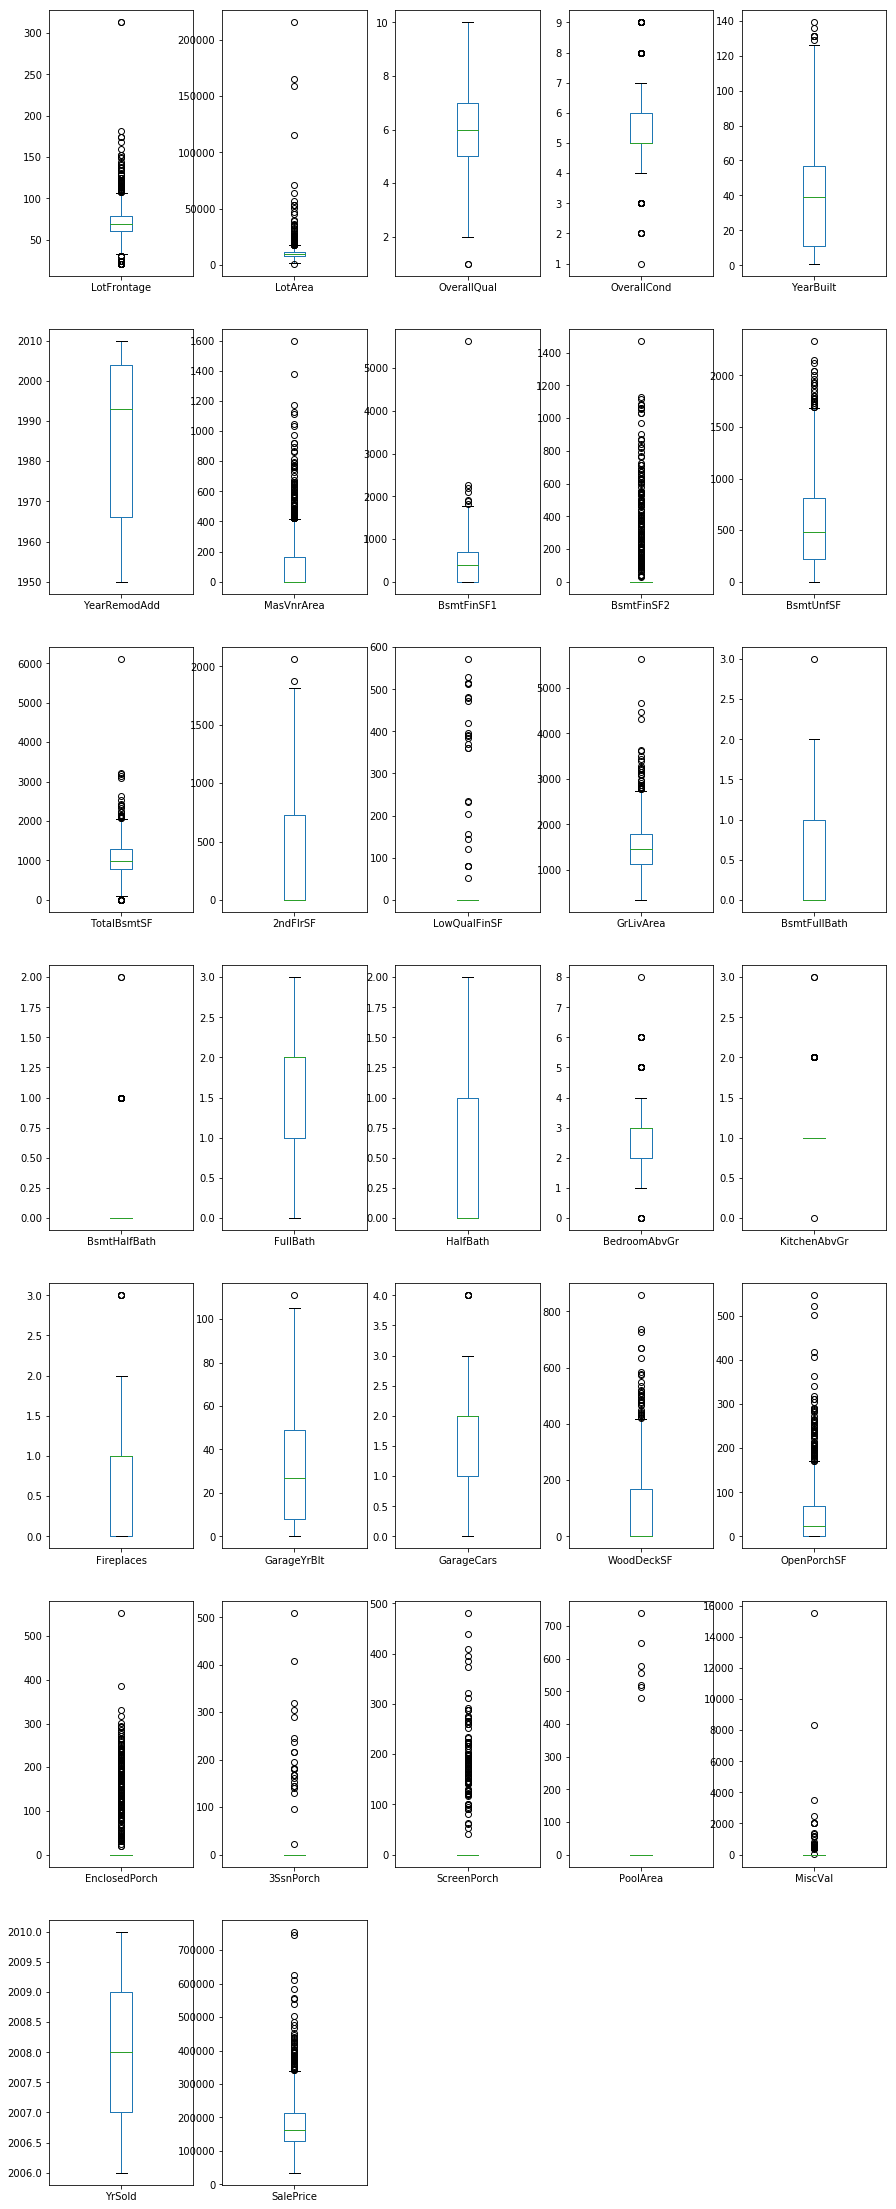

In [24]:
#lets check outliers with boxplot
plt.figure(figsize=(15, 40))
for i in range(len(nums)):
    plt.subplot(math.ceil(len(nums)/5),5,i+1)
    #plt.boxplot(df[nums[i]])
    df[nums[i]].plot.box()
plt.show()#do not see any outliers that in any of the features. PoolArea seems like it has outliers, but the lower quartile simply represents houses with no pool.

### ---------------------------------------------End of Data Visualization----------------------------------------------------

### -----------------------------------------------------Data Preparation--------------------------------------------------------

<b>Creating Dummy variables:</b><br>
Let's create dummy variables for categoric data

In [25]:
#converting data to binary values, only CentralAir field is binary
df["CentralAir"]=df["CentralAir"].map({'Y': 1, "N": 0})
#df["CentralAir"].dtype#this is an integer

In [26]:
#creating dummy variables
nums=df.select_dtypes(include=['float64','int64']).columns.tolist()#all numeric columns
objs=df.select_dtypes(include=['object']).columns.tolist()#all non-numeric columns
df_cat_dum=pd.get_dummies(df[objs], drop_first=True)#dataframe with dummy varaibles
hd = pd.concat([df[nums], df_cat_dum], axis = 1)#concatenating dummy variables with numeric variables

hd.shape#now we have 280 columns instead of 77

(1451, 280)

<b>Splitting data into train and test groups:</b><br>
Splitting data randomly into 70% training and 30% testing sets

In [27]:
from sklearn.model_selection import train_test_split
X = hd.drop('SalePrice', axis=1, inplace=False)
y = hd['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1015, 279)
X_test Shape: (436, 279)
y_train Shape: (1015,)
y_test Shape: (436,)


In [28]:
X_train.head(3)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeatu

In [29]:
y_train.head(3)

801     109900
569     135960
1181    392500
Name: SalePrice, dtype: int64

<b>Scaling continous data:</b><br>
Scaling continous data to fit in the range 0-1<br>
Note: We scale with minmax scaler only on train data, that too on independent variables only

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
Numeric_Columns = nums.copy()#working on a copy of numeric columns list
Numeric_Columns.remove('SalePrice')
X_train[Numeric_Columns] = scaler.fit_transform(X_train[Numeric_Columns])#this will convert CentralAir from integer to float, but it doesnt impact the model
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeatu

In [32]:
X_test[Numeric_Columns] = scaler.transform(X_test[Numeric_Columns])#applying the train data scaler on test data
X_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NoBasement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NoBasement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_NoBasement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NoBasement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NoBasement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NoFireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NoGarage,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NoGarage,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_NoPool,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NoFence,MiscFeatu

### -------------------------------------------------End of Data Preparation----------------------------------------------------

### ------------------------------------------------------Building Model---------------------------------------------------------

Let's start with a simple linear regression. <br>
We will build a simple model without regularization and compare the r2_scores of train vs test data<br>

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [34]:
slr = LinearRegression()
slr.fit(X_train,y_train)#fitting linear regression on train data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
y_train_pred = slr.predict(X_train)#predicting outputs for training data with trained model

In [36]:
r2_score(y_train , y_train_pred)#r2 score seems pretty good

0.9526536213917283

In [37]:
y_train_res = y_train - y_train_pred#residuals for train data

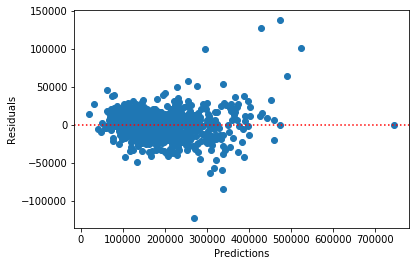

In [38]:
plt.scatter( y_train_pred , y_train_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residuals")
plt.show()#the residuals are showing somewhat inconsistent as the sale price increases

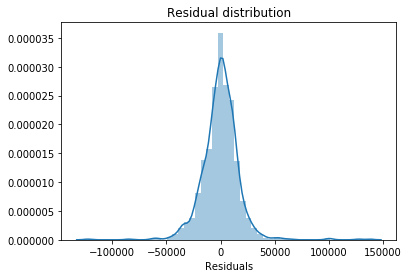

In [39]:
sns.distplot(y_train_res,kde=True)

plt.title('Residual distribution')
plt.xlabel("Residuals")
plt.show()#we can see few minor tails over the distribution, but overall, the distribution seems acceptable.

<b>Predicting on test data</b>

In [40]:
y_test_pred = slr.predict(X_test)#predicting saleprice on test data with the model prepared on train data

In [41]:
r2_score(y_test , y_test_pred)#r2 score is negative, which means the trained model is worse than the line passing through output mean

-4.750550342173733e+19

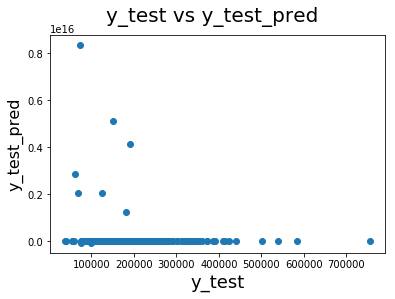

In [42]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)  
plt.xlabel('y_test', fontsize=18)                   
plt.ylabel('y_test_pred', fontsize=16)  
plt.show()#y_test_pred seems to be zero for most data. This can make the residuals large and thereby RMSE large

In order to generalise the model, we have to perform regularization.

### Ridge Regression
Let's perform ridge regression and check the model performance

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

folds = 5 #to perform 5 fold validation
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(X_train, y_train)#fitting ridge model on train data for multiple alpha

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [44]:
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)#converting results dict to DF
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=100]#after plotting, we realized that model gets fined tuned at below 10, so taking subset for better plot
ridge_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.021899,0.007677,0.001600,0.001960,0.0001,{'alpha': 0.0001},-25772.888048,-15337.591189,-20917.930555,-21422.429720,-20123.883399,-20714.944582,3328.357357,14,-11209.626655,-11948.174914,-11264.513522,-11485.035669,-10548.754675,-11291.221087,453.382784
1,0.020000,0.002530,0.001602,0.001962,0.001,{'alpha': 0.001},-25755.066170,-14944.142065,-19543.937491,-19820.157306,-20694.790455,-20151.618697,3443.562548,3,-11209.263736,-12144.025093,-11481.223141,-11730.257907,-10732.954351,-11459.544846,475.992248
2,0.013600,0.004079,0.000801,0.001602,0.01,{'alpha': 0.01},-25591.010840,-16050.010993,-20532.645498,-21887.588291,-20401.653065,-20892.581738,3062.232210,15,-11209.043650,-12342.883350,-11639.643257,-11894.650723,-10900.128809,-11597.269958,506.536394
3,0.012800,0.002991,0.002401,0.001960,0.1,{'alpha': 0.1},-24682.239462,-17756.088763,-20369.083027,-20197.761434,-20142.557150,-20629.545967,2243.769944,13,-11272.889452,-13442.413055,-12754.887575,-12381.860271,-12134.482754,-12397.306621,714.666431
4,0.019208,0.003002,0.001615,0.001978,0.5,{'alpha': 0.5},-23400.924110,-19069.132709,-20267.160204,-19645.949730,-20206.219408,-20517.877232,1505.394778,12,-11862.541134,-14888.944491,-14259.735151,-14011.781285,-13825.619910,-13769.724394,1019.002257


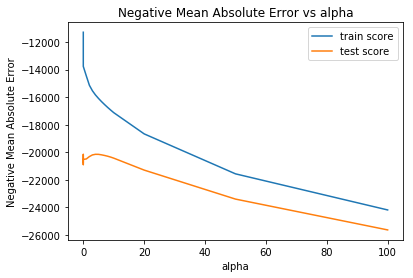

In [45]:
# plotting mean test and train scores of 5 fold validation w.r.t alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')#converting from object to int


plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error vs alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [46]:
print("Best value of alpha is: \n",ridge_model_cv.best_params_)

Best value of alpha is: 
 {'alpha': 4.0}


In [47]:
#building ridge model with best alpha obtained in previous step
alpha = 4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_#model coefficients

array([-4.73772050e+02,  2.78528214e+04,  6.46011691e+04,  2.34694222e+04,
       -1.58748341e+03,  7.86148197e+03,  2.54661327e+04,  1.88359309e+04,
        3.51359071e+03,  1.54427949e+04,  2.39475589e+04,  7.55913130e+03,
        5.23688336e+04,  2.23886912e+03,  6.97660219e+04,  2.22382279e+04,
       -5.54002212e+03,  3.37031103e+04,  1.53806548e+04,  1.50149333e+04,
       -1.01303860e+04,  2.50932207e+04, -2.33117247e+03,  4.55455559e+04,
        1.81553319e+04,  1.90260888e+03,  2.53297380e+03,  1.45104286e+04,
        1.02485744e+04,  1.70601092e+04, -1.99626712e+03, -2.53564743e+03,
       -6.29796727e+03,  2.81245932e+03,  3.25523004e+03,  2.37689031e+03,
       -2.89789119e+03,  4.32917516e+03,  1.30498720e+04, -2.30050636e+02,
       -2.49721960e+03, -4.60750845e+03, -1.15715874e+04, -1.27647140e+04,
       -3.68248515e+03, -6.12937328e+03,  9.42123202e+03,  8.44078167e+03,
        1.03374322e+04,  3.45489097e+03,  1.32859554e+04, -2.83305132e+03,
        6.33146674e+02,  

As we can see above, the ridge regression is giving a reasonable balance between train and test data at lambda =4. Also, there is a drawback with coefficients. All of them are non-zero.

### Lasso Regression
Let's perform lasso regression and check the model performance

In [48]:
lasso = Lasso()

# cross validation
lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(X_train, y_train)#fitting lasso model on train data for multiple alpha

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.2s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [49]:
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)#converting results dict to DF
lasso_cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.322011,0.057206,0.000798,0.001595,0.0001,{'alpha': 0.0001},-25604.295555,-14246.560824,-20287.446238,-20812.683599,-20749.903463,-20340.177936,3612.119075,18,-11211.342135,-12211.654072,-11543.095881,-11782.735387,-10785.689563,-11506.903408,486.121909
1,0.261159,0.036089,0.000799,0.001599,0.001,{'alpha': 0.001},-25603.290638,-14246.379009,-20283.582439,-20812.323551,-20748.888652,-20338.892858,3611.866592,17,-11211.350755,-12211.589461,-11543.037137,-11782.729380,-10785.632480,-11506.867843,486.117509
2,0.245405,0.027318,0.000801,0.001603,0.01,{'alpha': 0.01},-25594.911919,-14244.560562,-20244.953698,-20807.327987,-20738.739318,-20326.098697,3609.818202,16,-11211.497296,-12211.120559,-11542.546705,-11782.761514,-10785.372351,-11506.659685,486.037339
3,0.232789,0.019392,0.000813,0.001626,0.1,{'alpha': 0.1},-25571.391819,-14226.133436,-20012.650215,-20715.950499,-20681.718887,-20241.568971,3607.316173,15,-11213.262481,-12209.144690,-11538.476807,-11786.183291,-10783.660817,-11506.145617,486.094419
4,0.228989,0.015659,0.000796,0.001592,0.5,{'alpha': 0.5},-25438.269507,-14148.371128,-19631.995401,-20357.782055,-20598.763032,-20035.036225,3589.767418,14,-11219.966981,-12200.588797,-11527.224510,-11803.178872,-10777.536890,-11505.699210,486.557766


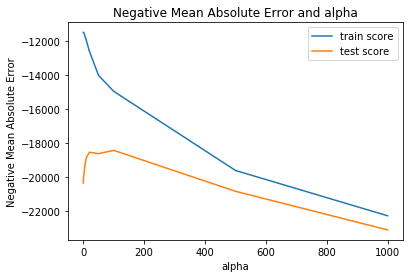

In [50]:
# plotting mean test and train scores of 5 fold validation w.r.t alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float32')


plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [51]:
print("Best value of alpha is: \n",lasso_model_cv.best_params_)

Best value of alpha is: 
 {'alpha': 100}


In [52]:
#building lasso model with best alpha obtained in previous step
alpha =100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

lasso.coef_#model coefficients

array([-0.00000000e+00,  3.19136328e+04,  8.78503191e+04,  2.86367456e+04,
       -5.52312015e+03,  5.35925882e+03,  2.14991315e+04,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  5.47087202e+03,
        1.07115138e+04, -0.00000000e+00,  2.47683142e+05,  2.18527974e+04,
       -0.00000000e+00,  1.35769481e+04,  8.14773994e+03, -0.00000000e+00,
       -6.27897595e+03,  9.75425037e+03, -0.00000000e+00,  4.55386860e+04,
        1.51992394e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.94531318e+03,  2.85641179e+04, -0.00000000e+00, -3.39128610e+02,
       -1.25199252e+03,  0.00000000e+00,  0.00000000e+00,  1.34242735e+03,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -1.15377977e+04, -3.25232155e+03, -3.99103124e+03,
       -0.00000000e+00, -7.52423798e+03,  5.79143484e+03,  0.00000000e+00,
        6.77612944e+03, -2.37117486e+02,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  

As we can see above, the lasso regression is giving a reasonable balance between train and test data at lambda =100.
Also, a good number of coefficients are zero making a better choice compared to ridge.

Let's check the residual distributions of train and test data with ridge and lasso models

In [53]:
y_train_ridge_pred = ridge.predict(X_train)#y_train prediction using ridge
y_train_lasso_pred = lasso.predict(X_train)#y_train prediction using lasso

y_test_ridge_pred = ridge.predict(X_test)#y_test prediction using ridge
y_test_lasso_pred = lasso.predict(X_test)#y_test prediction using lasso

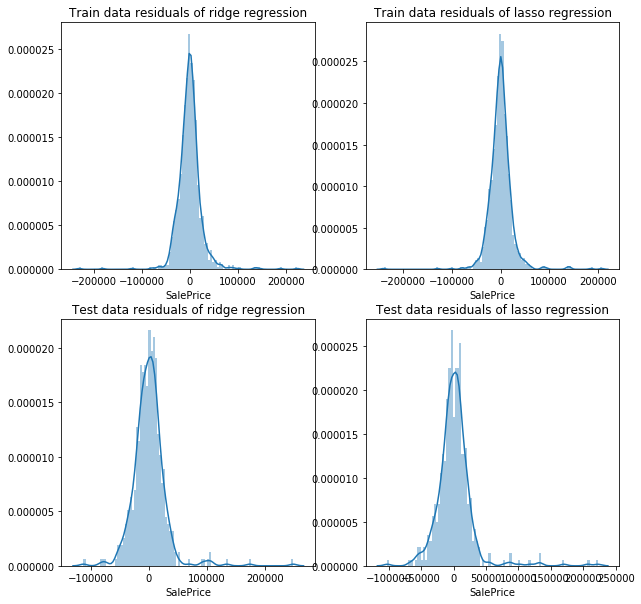

In [54]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 1)
sns.distplot((y_train - y_train_ridge_pred), bins = 100)
plt.title('Train data residuals of ridge regression')

plt.subplot(2, 2, 2)
sns.distplot((y_train - y_train_lasso_pred), bins = 100)
plt.title('Train data residuals of lasso regression')


plt.subplot(2, 2, 3)
sns.distplot((y_test - y_test_ridge_pred), bins = 100)
plt.title('Test data residuals of ridge regression')

plt.subplot(2, 2, 4)
sns.distplot((y_test - y_test_lasso_pred), bins = 100)
plt.title('Test data residuals of lasso regression')
plt.show()#the resdisuals look well distributed

In [55]:
#checking r2 score for both train and test data for using both ridge and lasso regression 
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_train_ridge_pred), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_train_lasso_pred), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_test_ridge_pred), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_test_lasso_pred), 2))
#the r2 score looks consistent for both ridge and lasso

r2_score in train dataset:
r2_score for ridge: 0.9
r2_score for lasso: 0.9
r2_score in test dataset:
r2_score for ridge: 0.87
r2_score for lasso: 0.87


### ------------------------------------------------------End of Model build---------------------------------------------------------

### ------------------------------------------------------Model Insights---------------------------------------------------------

Let's gain insights from the model, like top features.
Note: We are picking lasso regressionas it does feature selection

In [56]:
#lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
coeff_dict=dict(zip(cols,model_parameters))
print("Length before removing zero coefficients: ",len(coeff_dict))#279+1constant
coeff_dict#features and coefficient values

Length before removing zero coefficients:  280


{'constant': 23540.421,
 'LotFrontage': -0.0,
 'LotArea': 31913.633,
 'OverallQual': 87850.319,
 'OverallCond': 28636.746,
 'YearBuilt': -5523.12,
 'YearRemodAdd': 5359.259,
 'MasVnrArea': 21499.131,
 'BsmtFinSF1': 0.0,
 'BsmtFinSF2': -0.0,
 'BsmtUnfSF': 0.0,
 'TotalBsmtSF': 0.0,
 'CentralAir': 5470.872,
 '2ndFlrSF': 10711.514,
 'LowQualFinSF': -0.0,
 'GrLivArea': 247683.142,
 'BsmtFullBath': 21852.797,
 'BsmtHalfBath': -0.0,
 'FullBath': 13576.948,
 'HalfBath': 8147.74,
 'BedroomAbvGr': -0.0,
 'KitchenAbvGr': -6278.976,
 'Fireplaces': 9754.25,
 'GarageYrBlt': -0.0,
 'GarageCars': 45538.686,
 'WoodDeckSF': 15199.239,
 'OpenPorchSF': 0.0,
 'EnclosedPorch': -0.0,
 '3SsnPorch': 0.0,
 'ScreenPorch': 3945.313,
 'PoolArea': 28564.118,
 'MiscVal': -0.0,
 'YrSold': -339.129,
 'MSSubClass_30': -1251.993,
 'MSSubClass_40': 0.0,
 'MSSubClass_45': 0.0,
 'MSSubClass_50': 1342.427,
 'MSSubClass_60': 0.0,
 'MSSubClass_70': -0.0,
 'MSSubClass_75': 0.0,
 'MSSubClass_80': 0.0,
 'MSSubClass_85': -0.0,
 '

In [57]:
#we will take only non-zero coefficients
coeff_dict = {key:val for key, val in coeff_dict.items() if val != 0}
print("length after removing zero coefficients: ",len(coeff_dict))

length after removing zero coefficients:  124


In [58]:
#sorting coefficients
coeff_dict_sorted={k: v for k, v in sorted(coeff_dict.items(), key=lambda item: item[1], reverse=True)}#descending order
coeff_dict_sorted

{'GrLivArea': 247683.142,
 'OverallQual': 87850.319,
 'GarageCars': 45538.686,
 'Neighborhood_NoRidge': 37523.527,
 'LotArea': 31913.633,
 'Neighborhood_NridgHt': 31310.482,
 'Neighborhood_StoneBr': 28882.504,
 'OverallCond': 28636.746,
 'PoolArea': 28564.118,
 'constant': 23540.421,
 'RoofMatl_WdShngl': 22995.099,
 'BsmtFullBath': 21852.797,
 'MasVnrArea': 21499.131,
 'Neighborhood_Crawfor': 18561.993,
 'BsmtExposure_Gd': 18282.661,
 'Exterior1st_BrkFace': 17760.654,
 'SaleType_New': 15326.248,
 'WoodDeckSF': 15199.239,
 'Exterior2nd_ImStucc': 14531.056,
 'FullBath': 13576.948,
 'LotConfig_CulDSac': 11831.051,
 'HouseStyle_1Story': 11687.42,
 'Neighborhood_Somerst': 11604.508,
 'Functional_Typ': 11572.395,
 'LandContour_HLS': 11178.478,
 '2ndFlrSF': 10711.514,
 'Fireplaces': 9754.25,
 'Condition1_Norm': 9490.469,
 'LandContour_Lvl': 8979.923,
 'HalfBath': 8147.74,
 'Neighborhood_BrkSide': 7298.714,
 'MSZoning_RL': 6776.129,
 'BsmtCond_TA': 6631.983,
 'LotShape_IR2': 6363.372,
 'BsmtFi

In [59]:
coeff_dict_sorted_pos=list(coeff_dict_sorted.keys())[:10]#top 10 features in descending order based on their ability to increase price
#10th features is the intercept(constant), so we can take 11th feature RoofMatl_WdShngl in it's place
coeff_dict_sorted_neg=list(coeff_dict_sorted.keys())[-1:-11:-1]#top 10 features based on their ability to decrease price
print('Top 10 positive features are: ')
print(coeff_dict_sorted_pos)#these coefficients increase price
print('Top 10 negative features are: ')
print(coeff_dict_sorted_neg)#these coefficients decrease price

Top 10 positive features are: 
['GrLivArea', 'OverallQual', 'GarageCars', 'Neighborhood_NoRidge', 'LotArea', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'OverallCond', 'PoolArea', 'constant']
Top 10 negative features are: 
['Condition2_PosN', 'PoolQC_Gd', 'KitchenQual_TA', 'BsmtQual_Gd', 'BsmtQual_TA', 'KitchenQual_Gd', 'BldgType_Twnhs', 'BsmtQual_Fa', 'KitchenQual_Fa', 'BldgType_TwnhsE']


In [60]:
#features sorted based on their absolute coefficients
coeff_dict_abs_sorted={k: v for k, v in sorted(coeff_dict.items(), key=lambda item: abs(item[1]), reverse=True)}#descending order
coeff_dict_abs_sorted

{'GrLivArea': 247683.142,
 'Condition2_PosN': -208419.433,
 'PoolQC_Gd': -131046.019,
 'OverallQual': 87850.319,
 'GarageCars': 45538.686,
 'Neighborhood_NoRidge': 37523.527,
 'LotArea': 31913.633,
 'Neighborhood_NridgHt': 31310.482,
 'Neighborhood_StoneBr': 28882.504,
 'OverallCond': 28636.746,
 'PoolArea': 28564.118,
 'constant': 23540.421,
 'RoofMatl_WdShngl': 22995.099,
 'KitchenQual_TA': -22139.516,
 'BsmtQual_Gd': -22122.525,
 'BsmtFullBath': 21852.797,
 'MasVnrArea': 21499.131,
 'BsmtQual_TA': -21059.984,
 'KitchenQual_Gd': -20784.601,
 'Neighborhood_Crawfor': 18561.993,
 'BsmtExposure_Gd': 18282.661,
 'Exterior1st_BrkFace': 17760.654,
 'BldgType_Twnhs': -15396.719,
 'SaleType_New': 15326.248,
 'BsmtQual_Fa': -15219.2,
 'WoodDeckSF': 15199.239,
 'Exterior2nd_ImStucc': 14531.056,
 'KitchenQual_Fa': -14324.059,
 'FullBath': 13576.948,
 'LotConfig_CulDSac': 11831.051,
 'BldgType_TwnhsE': -11776.748,
 'HouseStyle_1Story': 11687.42,
 'Neighborhood_Somerst': 11604.508,
 'Functional_Ty

In [61]:
print('Top 10 features based on absolute coefficients are: ')
print(list(coeff_dict_abs_sorted.keys())[:10])

Top 10 features based on absolute coefficients are: 
['GrLivArea', 'Condition2_PosN', 'PoolQC_Gd', 'OverallQual', 'GarageCars', 'Neighborhood_NoRidge', 'LotArea', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'OverallCond']


### Key Takeaways

1. Optimum value for lambda in ridge regression is 4
2. Optimum value for lambda in lasso regression is 100
3. Lasso is a preferrable model as we have too many features, and lasso picks only important features.
4. r2_score in train dataset: ridge: 0.9, lasso: 0.9
5. r2_score in test dataset: ridge: 0.87, lasso: 0.87
6. The buyer needs to pick the minimum of these values when buying a property(as these tend to increase price drastically):
    GrLivArea, OverallQual, GarageCars, Neighborhood_NoRidge(avoid this category if possible), LotArea
7. The buyer needs to pick these sub-categories when buying a property(as these tend to minimize price increase significantly):
    Condition2_PosN, PoolQC_Gd, KitchenQual_TA, BsmtQual_Gd, BsmtQual_TA

### ----------------------------------------------End of Model Insights---------------------------------------------------------

### ----------------------------------------------Subjective questions---------------------------------------------------------

We will run code related to subjective questions here. Answers will still be in PDF

In [62]:
#running ridge and lasso with double of corresponding optimal alpha value
ridge_double = Ridge(alpha=8)#using alpha=2*4
ridge_double.fit(X_train, y_train)
#ridge_double.coef_#model coefficients


lasso_double = Lasso(alpha=200)#using alpha=2*100
lasso_double.fit(X_train, y_train) 
#lasso_double.coef_

Lasso(alpha=200, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
y_train_ridge_d_pred = ridge_double.predict(X_train)#y_train prediction using ridge
y_train_lasso_d_pred = lasso_double.predict(X_train)#y_train prediction using lasso

y_test_ridge_d_pred = ridge_double.predict(X_test)#y_test prediction using ridge
y_test_lasso_d_pred = lasso_double.predict(X_test)#y_test prediction using lasso

In [64]:
#checking r2 score for both train and test data for using both ridge and lasso regression woth double alpha
print('r2_score in train dataset:')
print('r2_score for ridge:', round(r2_score(y_train, y_train_ridge_d_pred), 2))
print('r2_score for lasso:', round(r2_score(y_train, y_train_lasso_d_pred), 2))

print('r2_score in test dataset:')
print('r2_score for ridge:', round(r2_score(y_test, y_test_ridge_d_pred), 2))
print('r2_score for lasso:', round(r2_score(y_test, y_test_lasso_d_pred), 2))
#there seems to be slight decrease in r2_score for both test and train data for both ridge and lasso

r2_score in train dataset:
r2_score for ridge: 0.88
r2_score for lasso: 0.88
r2_score in test dataset:
r2_score for ridge: 0.86
r2_score for lasso: 0.86


In [65]:
#lasso model parameters
new_model_parameters = list(lasso_double.coef_)
new_model_parameters.insert(0, lasso_double.intercept_)
new_model_parameters = [round(x, 3) for x in new_model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
new_coeff_dict=dict(zip(cols,new_model_parameters))
print("Length before removing zero coefficients: ",len(new_coeff_dict))
#new_coeff_dict#features and coefficient values

Length before removing zero coefficients:  280


In [66]:
#we will take only non-zero coefficients
new_coeff_dict = {key:val for key, val in new_coeff_dict.items() if val != 0}
print("length after removing zero coefficients: ",len(new_coeff_dict))#88 is a drastic fall compared to previous 124
#new_coeff_dict

length after removing zero coefficients:  88


In [67]:
#sorting coefficients
new_coeff_dict_sorted={k: v for k, v in sorted(new_coeff_dict.items(), key=lambda item: item[1], reverse=True)}#descending order
#new_coeff_dict_sorted

In [68]:
new_coeff_dict_sorted_pos=list(new_coeff_dict_sorted.keys())[:10]#top 10 features in descending order based on their ability to increase price
#6th feature is the intercept(constant), so we can take 11th feature Exterior1st_BrkFace as 10th
new_coeff_dict_sorted_neg=list(new_coeff_dict_sorted.keys())[-1:-11:-1]#top 10 features based on their ability to decrease price
print('Top 10 positive features are: ')
print(new_coeff_dict_sorted_pos)#these coefficients increase price
print('Top 10 negative features are: ')
print(new_coeff_dict_sorted_neg)#these coefficients decrease price

Top 10 positive features are: 
['GrLivArea', 'OverallQual', 'GarageCars', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'constant', 'Neighborhood_StoneBr', 'OverallCond', 'BsmtFullBath', 'BsmtExposure_Gd']
Top 10 negative features are: 
['Condition2_PosN', 'PoolQC_Gd', 'KitchenQual_TA', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BsmtQual_TA', 'BsmtExposure_NoBasement', 'BldgType_Twnhs', 'Neighborhood_Edwards', 'BldgType_TwnhsE']


In [69]:
#features sorted based on their absolute coefficients
new_coeff_dict_abs_sorted={k: v for k, v in sorted(new_coeff_dict.items(), key=lambda item: abs(item[1]), reverse=True)}#descending order
#new_coeff_dict_abs_sorted

In [70]:
print('Top 10 features based on absolute coefficients are: ')
print(list(new_coeff_dict_abs_sorted.keys())[:10])#8th feature is the intercept(constant), so we can take 11th feature BsmtFullBath as 10th

Top 10 features based on absolute coefficients are: 
['GrLivArea', 'OverallQual', 'Condition2_PosN', 'GarageCars', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'PoolQC_Gd', 'constant', 'Neighborhood_StoneBr', 'OverallCond']


Let's drop top 5 important features and rebuild the model<br>
For this, we drop top 5 absolute features

In [71]:
drp_lst=list(coeff_dict_abs_sorted.keys())[:5]
X_train_new=X_train.drop(drp_lst, axis='columns',inplace=False)#we build a model on this
X_test_new=X_test.drop(drp_lst, axis='columns',inplace=False)
print("Number of columns reduced from",X_train.shape[1],"to",X_train_new.shape[1])#checking column sizes
print("Dropped columns are:",drp_lst)

Number of columns reduced from 279 to 274
Dropped columns are: ['GrLivArea', 'Condition2_PosN', 'PoolQC_Gd', 'OverallQual', 'GarageCars']


In [72]:
lasso = Lasso()
new_lasso_model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

new_lasso_model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   18.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [73]:
new_lasso_cv_results = pd.DataFrame(new_lasso_model_cv.cv_results_)#converting results dict to DF
new_lasso_cv_results.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.272003,0.038612,0.001594,0.001953,0.0001,{'alpha': 0.0001},-28185.768906,-19062.997503,-27052.961798,-28401.144991,-23815.790982,-25303.732836,3524.787777,18,-12659.613054,-14289.971687,-13141.255211,-13591.147089,-12918.811437,-13320.159696,573.302463


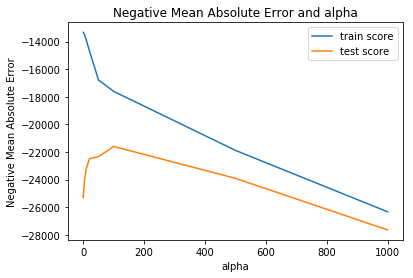

In [74]:
# plotting mean test and train scores of 5 fold validation w.r.t alpha 
new_lasso_cv_results['param_alpha'] = new_lasso_cv_results['param_alpha'].astype('float32')


plt.plot(new_lasso_cv_results['param_alpha'], new_lasso_cv_results['mean_train_score'])
plt.plot(new_lasso_cv_results['param_alpha'], new_lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [75]:
print("Best value of alpha is: \n",new_lasso_model_cv.best_params_)

Best value of alpha is: 
 {'alpha': 100}


In [76]:
#building lasso model with best alpha obtained in previous step
lasso_reduced = Lasso(alpha=100)
lasso_reduced.fit(X_train_new, y_train) 
#lasso_reduced.coef_#model coefficients

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

Let's check the residual distributions of train and test data with ridge and lasso models

In [77]:
y_train_lasso_pred_new = lasso_reduced.predict(X_train_new)#y_train prediction using lasso
y_test_lasso_pred_new = lasso_reduced.predict(X_test_new)#y_test prediction using lasso

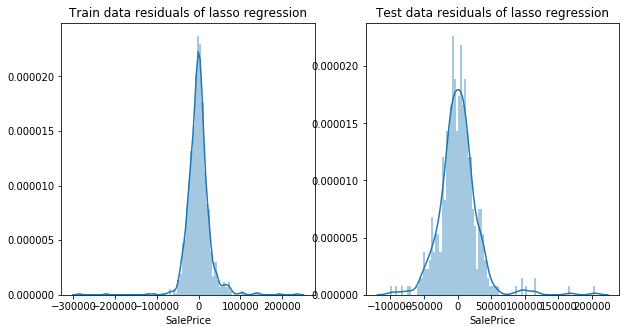

In [78]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.distplot((y_train - y_train_lasso_pred_new), bins = 100)
plt.title('Train data residuals of lasso regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_test_lasso_pred_new), bins = 100)
plt.title('Test data residuals of lasso regression')
plt.show()#the resdisuals look well distributed

In [79]:
#checking r2 score for both train and test data for using lasso regression 
print('r2_score for train dataset:', round(r2_score(y_train, y_train_lasso_pred_new), 2))
print('r2_score for test dataset:', round(r2_score(y_test, y_test_lasso_pred_new), 2))

r2_score for train dataset: 0.87
r2_score for test dataset: 0.87


Let's identify top features with new lasso model

In [80]:
#lasso model parameters
new_model_parameters_reduced = list(lasso_reduced.coef_)
new_model_parameters_reduced.insert(0, lasso_reduced.intercept_)
new_model_parameters_reduced = [round(x, 3) for x in new_model_parameters_reduced]
new_cols = X_train_new.columns
new_cols = new_cols.insert(0, "constant")
new_coeff_dict_reduced=dict(zip(new_cols,new_model_parameters_reduced))
print("Length before removing zero coefficients: ",len(new_coeff_dict_reduced))
#new_coeff_dict_reduced#features and coefficient values

Length before removing zero coefficients:  275


In [81]:
#we will take only non-zero coefficients
new_coeff_dict_reduced = {key:val for key, val in new_coeff_dict_reduced.items() if val != 0}
print("length after removing zero coefficients: ",len(new_coeff_dict_reduced))
#new_coeff_dict_reduced

length after removing zero coefficients:  131


In [82]:
#sorting coefficients
new_coeff_dict_red_sorted={k: v for k, v in sorted(new_coeff_dict_reduced.items(), key=lambda item: item[1], reverse=True)}#descending order
#new_coeff_dict_red_sorted

In [83]:
new_coeff_dict_red_sort_pos=list(new_coeff_dict_red_sorted.keys())[:10]#top 10 features in descending order based on their ability to increase price
#3rd feature is the intercept(constant), so we can take 11th feature 'LotArea' as 10th
new_coeff_dict_red_sort_neg=list(new_coeff_dict_red_sorted.keys())[-1:-11:-1]#top 10 features based on their ability to decrease price
print('Top 10 positive features are: ')
print(new_coeff_dict_red_sort_pos)#these coefficients increase price
print('Top 10 negative features are: ')
print(new_coeff_dict_red_sort_neg)#these coefficients decrease price

Top 10 positive features are: 
['TotalBsmtSF', '2ndFlrSF', 'constant', 'RoofMatl_WdShngl', 'Neighborhood_NoRidge', 'FullBath', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'OverallCond', 'Fireplaces']
Top 10 negative features are: 
['KitchenQual_TA', 'BsmtQual_TA', 'BsmtQual_Gd', 'KitchenQual_Gd', 'BldgType_Twnhs', 'BsmtQual_Fa', 'KitchenQual_Fa', 'BldgType_TwnhsE', 'BsmtExposure_NoBasement', 'Neighborhood_Edwards']


In [84]:
#features sorted based on their absolute coefficients
new_coeff_dict_red_abs_sort={k: v for k, v in sorted(new_coeff_dict_reduced.items(), key=lambda item: abs(item[1]), reverse=True)}#descending order
#new_coeff_dict_red_abs_sort

In [85]:
print('Top 10 features based on absolute coefficients are: ')
print(list(new_coeff_dict_red_abs_sort.keys())[:10])#3rd feature is the intercept(constant), so we can take 11th feature BsmtQual_TA as 10th

Top 10 features based on absolute coefficients are: 
['TotalBsmtSF', '2ndFlrSF', 'constant', 'RoofMatl_WdShngl', 'Neighborhood_NoRidge', 'FullBath', 'Neighborhood_StoneBr', 'Neighborhood_NridgHt', 'OverallCond', 'KitchenQual_TA']


### ----------------------------------------------End of Subjective questions--------------------------------------------------